<a href="https://colab.research.google.com/github/monish-reddy/monkey-pox-data-analysis/blob/main/monkeypox_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monkey pox patients dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 


#### import the data

In [ ]:
# import the data
df=pd.read_csv("DATA.csv")

#### First five rows

In [ ]:
## First five rows
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


#### Last five rows

In [ ]:
## Last five rows
df.tail()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
24995,P24995,None,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,None,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative
24999,P24999,Swollen Lymph Nodes,False,False,True,False,False,True,True,False,Positive


# Common Analysis

#### Shape of the data

In [ ]:
## Shape of the data
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 25000
Total Columns: 11


#### Columns names

In [ ]:
## Columns names
df.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

#### Data Details

In [ ]:
## Data Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Systemic Illness,25000.0,1.49352,1.122822,0.0,0.0,1.0,3.0,3.0
Rectal Pain,25000.0,0.49380,0.499972,0.0,0.0,0.0,1.0,1.0
Sore Throat,25000.0,0.50216,0.500005,0.0,0.0,1.0,1.0,1.0
Penile Oedema,25000.0,0.50448,0.499990,0.0,0.0,1.0,1.0,1.0
Oral Lesions,25000.0,0.49944,0.500010,0.0,0.0,0.0,1.0,1.0
Solitary Lesion,25000.0,0.50108,0.500009,0.0,0.0,1.0,1.0,1.0
Swollen Tonsils,25000.0,0.50132,0.500008,0.0,0.0,1.0,1.0,1.0
HIV Infection,25000.0,0.50336,0.499999,0.0,0.0,1.0,1.0,1.0
Sexually Transmitted Infection,25000.0,0.49784,0.500005,0.0,0.0,0.0,1.0,1.0
MonkeyPox,25000.0,0.63636,0.481056,0.0,0.0,1.0,1.0,1.0


#### Check for Null values

In [ ]:
## Check for Null values
df.isna().sum()

Patient_ID                        0
Systemic Illness                  0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Sexually Transmitted Infection    0
MonkeyPox                         0
dtype: int64

#### check for duplicate

In [ ]:
## check for duplicate
df.duplicated().sum()

0

#### Drop the id column

In [ ]:
## Drop the id column
df.drop("Patient_ID", axis = 1, inplace = True)


#### Convert Monkeypox to binary (0, 1) 

In [ ]:
## Convert Monkeypox to binary (0, 1) 
df = pd.get_dummies(df, columns=["MonkeyPox"], drop_first= True)


#### Rename the monkeypox column

In [ ]:
## Rename the monkeypox column
df = df.rename(columns={'MonkeyPox_Positive': 'MonkeyPox'})

#### Data Details

In [ ]:
## Data Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Systemic Illness                25000 non-null  object
 1   Rectal Pain                     25000 non-null  bool  
 2   Sore Throat                     25000 non-null  bool  
 3   Penile Oedema                   25000 non-null  bool  
 4   Oral Lesions                    25000 non-null  bool  
 5   Solitary Lesion                 25000 non-null  bool  
 6   Swollen Tonsils                 25000 non-null  bool  
 7   HIV Infection                   25000 non-null  bool  
 8   Sexually Transmitted Infection  25000 non-null  bool  
 9   MonkeyPox                       25000 non-null  uint8 
dtypes: bool(8), object(1), uint8(1)
memory usage: 415.2+ KB


# Color Palette

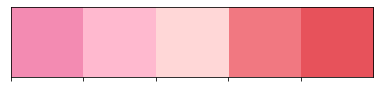

In [ ]:
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']

sns.palplot(color_mix, size = 1.3)

# Categorical variables analysis

In [ ]:
## Know the count of each value
for var in df.columns:
    print( df[var].value_counts())
    print("-------------------------------")

Fever                    6382
Swollen Lymph Nodes      6252
None                     6216
Muscle Aches and Pain    6150
Name: Systemic Illness, dtype: int64
-------------------------------
False    12655
True     12345
Name: Rectal Pain, dtype: int64
-------------------------------
True     12554
False    12446
Name: Sore Throat, dtype: int64
-------------------------------
True     12612
False    12388
Name: Penile Oedema, dtype: int64
-------------------------------
False    12514
True     12486
Name: Oral Lesions, dtype: int64
-------------------------------
True     12527
False    12473
Name: Solitary Lesion, dtype: int64
-------------------------------
True     12533
False    12467
Name: Swollen Tonsils, dtype: int64
-------------------------------
True     12584
False    12416
Name: HIV Infection, dtype: int64
-------------------------------
False    12554
True     12446
Name: Sexually Transmitted Infection, dtype: int64
-------------------------------
1    15909
0     9091
Name:

#### Draw Box Plot & Bar Chart function

In [ ]:
def draw_boxplot_and_barchart(labels, var, suptitle, xlable, xticks_indices):
    # Setting Colors, Labels, Order
    colors=color_mix[2:4]
    labels= labels
    order=df[var].value_counts().index

    ## Setting size & title of the figure
    plt.figure(figsize=(16, 8))
    plt.suptitle(suptitle,fontweight='heavy', 
                 fontsize='20', fontfamily='sans-serif')
    
    ## Pie chart
    plt.subplot(1, 2, 1)
    plt.pie(df[var].value_counts(), labels=labels, colors=colors,
            autopct='%.2f%%')
    centre=plt.Circle((0, 0), 0.45, fc='white')
    plt.gcf().gca().add_artist(centre)
 ## Countplot
    plt.subplot(1, 2, 2)
    sns.countplot(x= var, data=df, palette=colors, order=order)
    plt.xlabel( xlable, fontweight='bold', fontsize=11, fontfamily='sans-serif')
    plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
    plt.xticks(xticks_indices, labels)
    plt.grid(axis='y', alpha=0.4)

    plt.tight_layout()
    plt.show()

### Systemic Illness Distribution

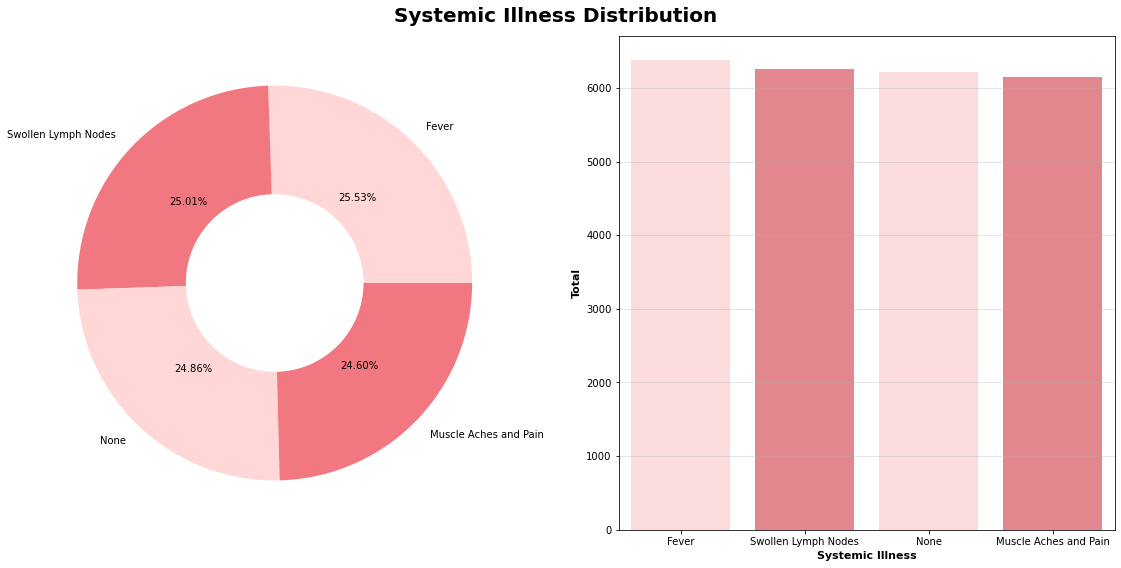

In [ ]:
draw_boxplot_and_barchart(["Fever", "Swollen Lymph Nodes", "None", "Muscle Aches and Pain"], 
                          "Systemic Illness", "Systemic Illness Distribution", 
                          "Systemic Illness", [0, 1, 2, 3])


 #### The distribution between different groups of systemic illness is almost the same.

### Rectal Pain Distribution

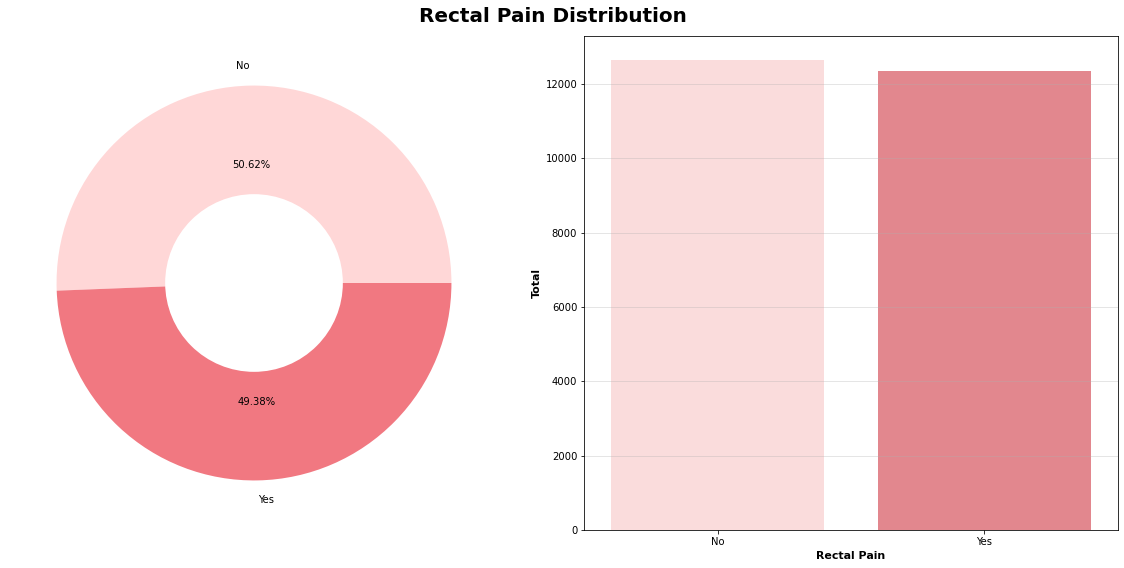

In [ ]:
draw_boxplot_and_barchart(["No", "Yes"], "Rectal Pain", 
                          "Rectal Pain Distribution", "Rectal Pain", [0, 1])

 #### The distribution of presence of rectal pain or not is almost the same.

### Sore Throat Distribution

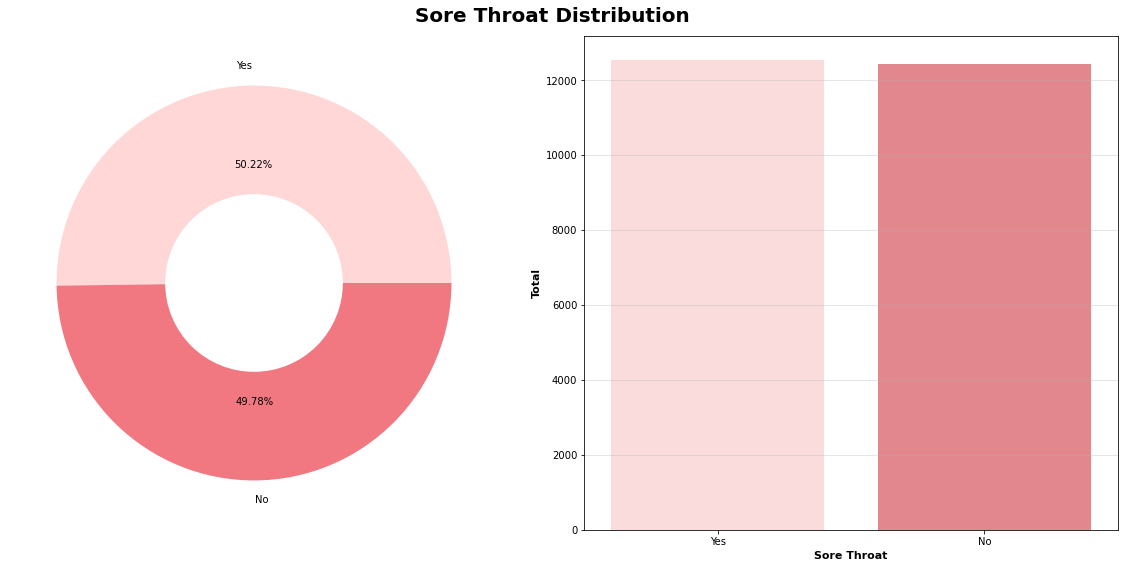

In [ ]:
draw_boxplot_and_barchart(["Yes", "No"], "Sore Throat", 
                          "Sore Throat Distribution", "Sore Throat", [0, 1])

#### The distribution of presence of sore throat or not is almost the same.

### Penile Oedema Distribution

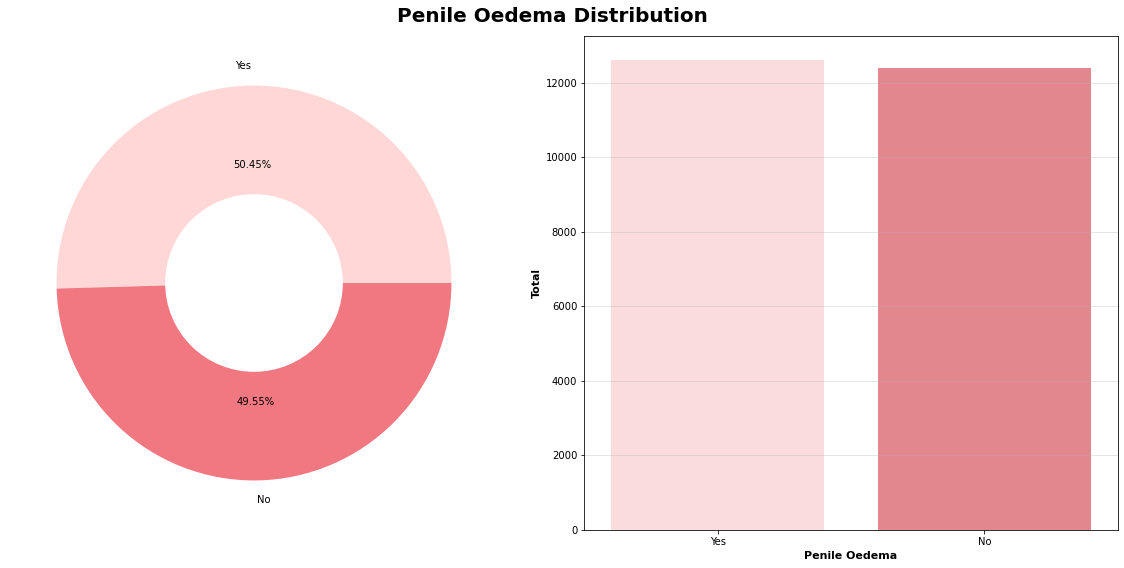

In [ ]:
draw_boxplot_and_barchart(["Yes", "No"], "Penile Oedema", 
                          "Penile Oedema Distribution", "Penile Oedema", [0, 1])

#### The distribution of presence of penile oedema or not is almost the same.

### Oral Lesions Distribution

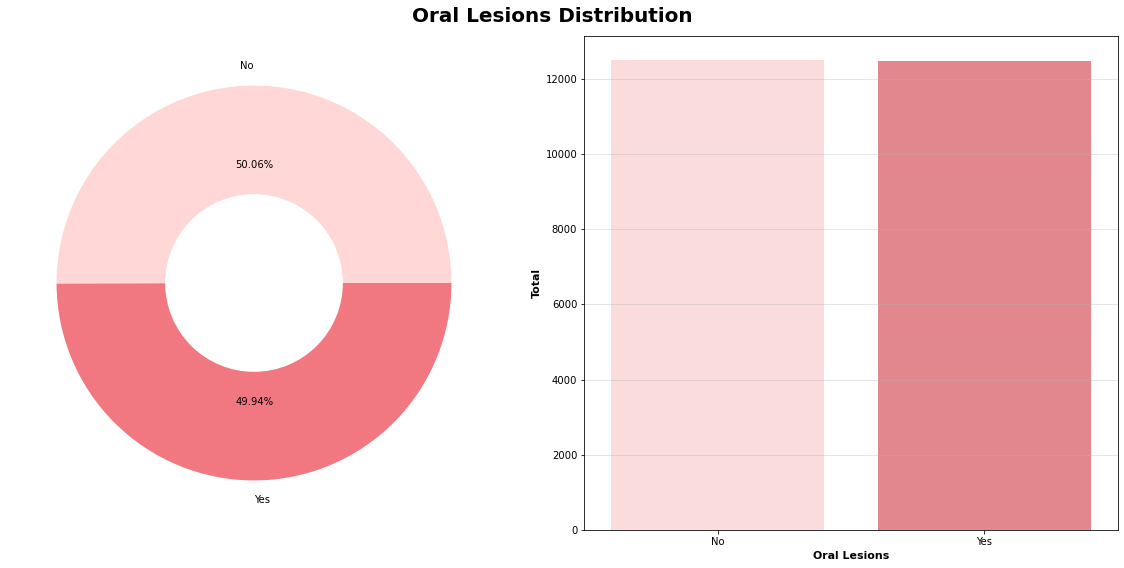

In [ ]:
draw_boxplot_and_barchart(["No", "Yes"], "Oral Lesions", 
                          "Oral Lesions Distribution", "Oral Lesions", [0, 1])

#### The distribution of presence of Oral Lesions or not is almost the same.

### Solitary Lesion Distribution

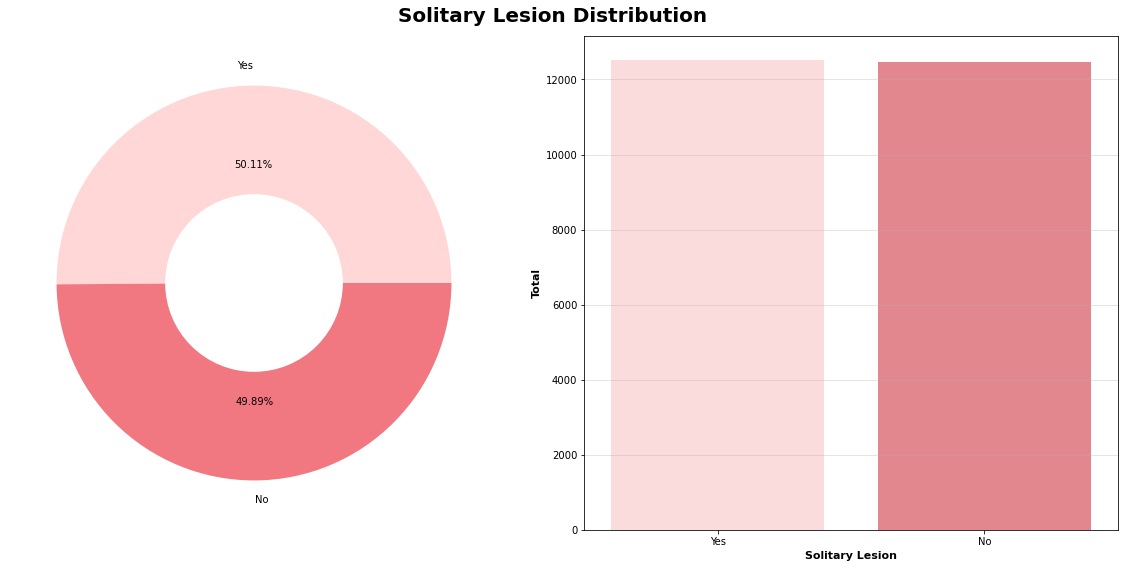

In [ ]:
draw_boxplot_and_barchart(["Yes", "No"], "Solitary Lesion", 
                          "Solitary Lesion Distribution", "Solitary Lesion", [0, 1])

#### The distribution of presence of Solitary Lesion or not is almost the same.

### Swollen Tonsils Distribution

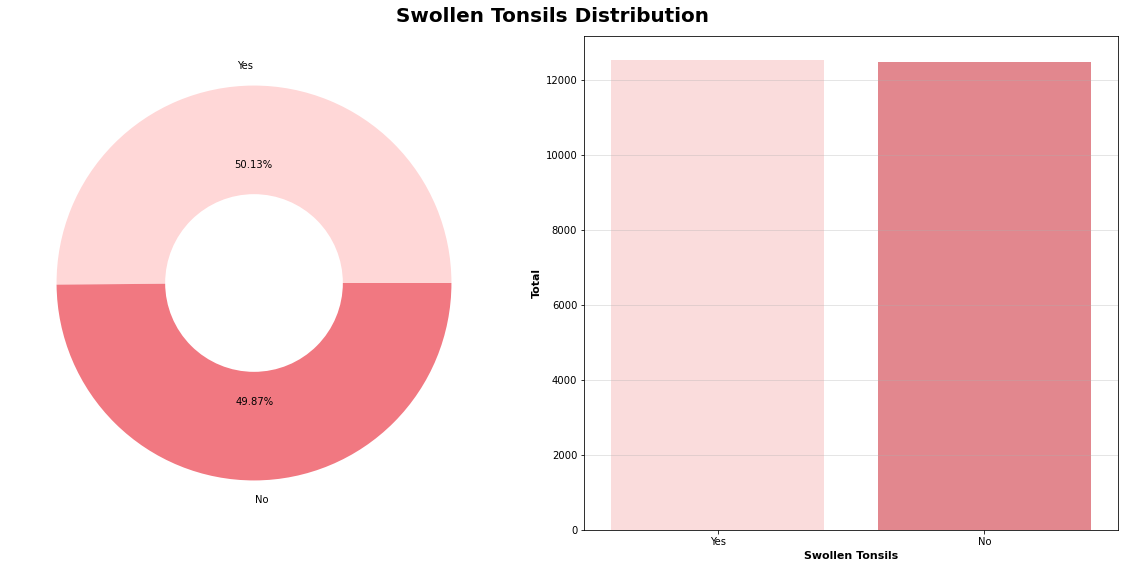

In [ ]:
draw_boxplot_and_barchart(["Yes", "No"], "Swollen Tonsils", 
                          "Swollen Tonsils Distribution", "Swollen Tonsils", [0, 1])

#### The distribution of presence of Swollen Tonsils or not is almost the same.

### HIV Infection Distribution

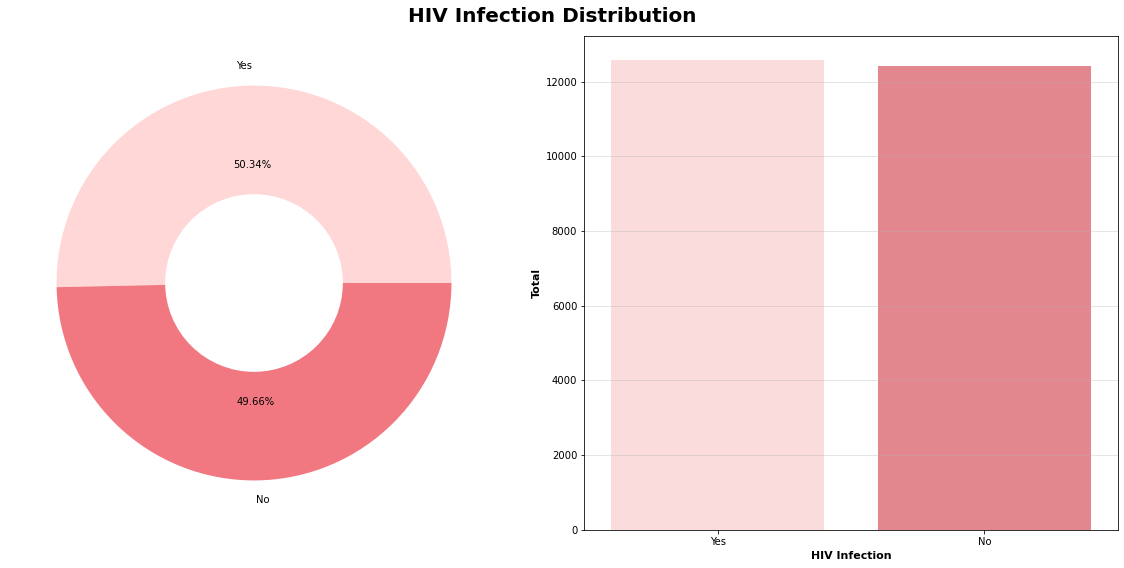

In [ ]:
draw_boxplot_and_barchart(["Yes", "No"], "HIV Infection", 
                          "HIV Infection Distribution", "HIV Infection", [0, 1])

#### The distribution of presence of HIV Infection or not is almost the same.

### Sexually Transmitted Infection Distribution

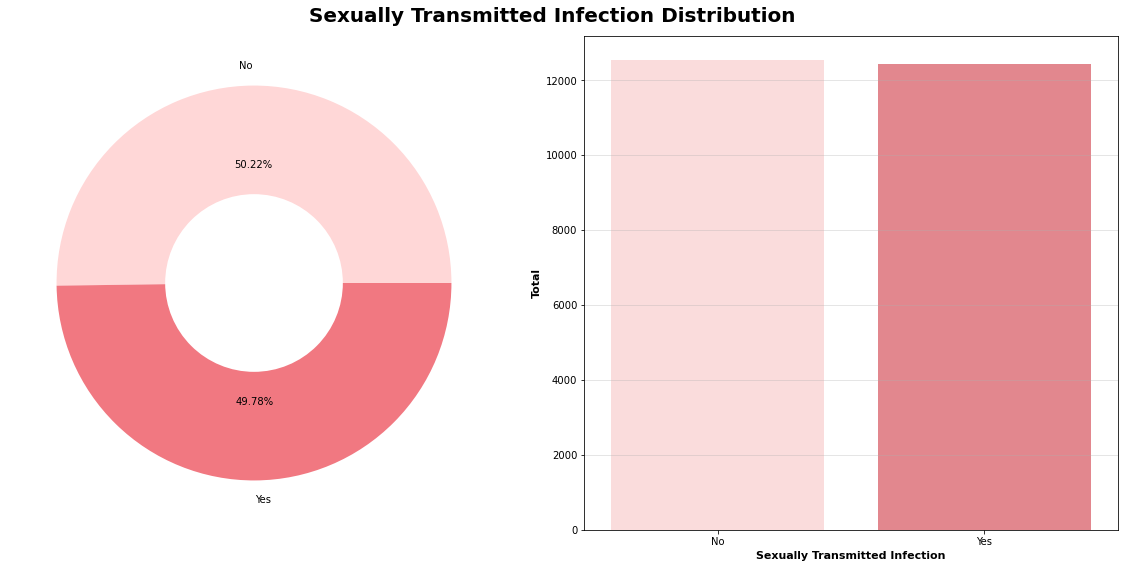

In [ ]:
draw_boxplot_and_barchart(["No", "Yes"], "Sexually Transmitted Infection", 
                          "Sexually Transmitted Infection Distribution", 
                          "Sexually Transmitted Infection", [0, 1])

#### The distribution of presence of Sexually Transmitted Infection or not is almost the same.

### Monkey Pox Distribution

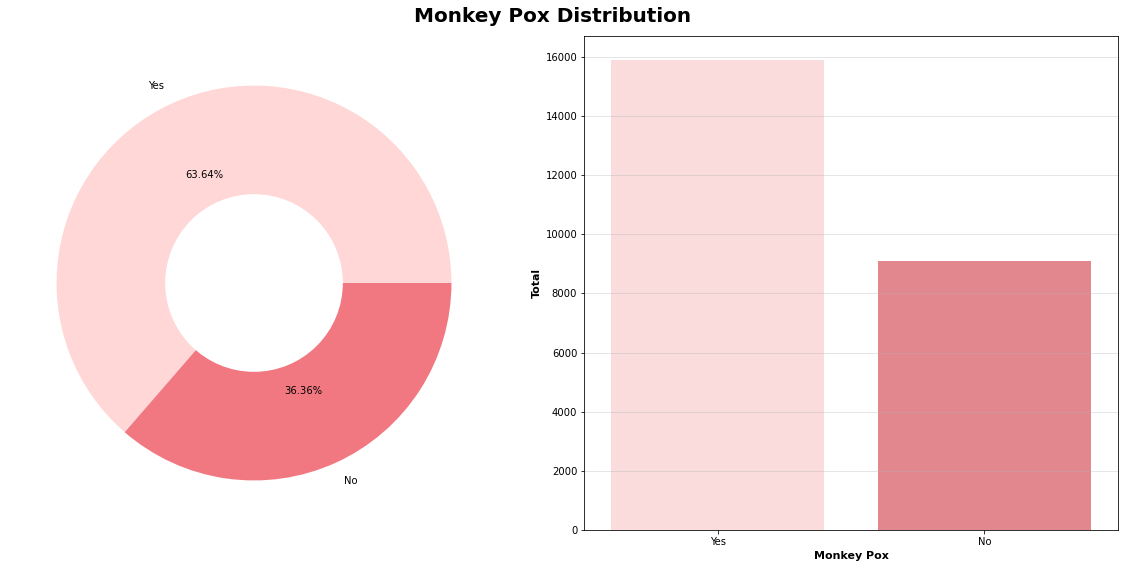

In [ ]:
draw_boxplot_and_barchart(["Yes", "No"], "MonkeyPox", 
                          "Monkey Pox Distribution", 
                          "Monkey Pox", [0, 1])

#### The distribution of presence of Monkey Pox Infection is higher than not have the infection.

# Analysis between the Target (MokeyPox) and other variables

#### Draw Bar Plot Function

In [ ]:
def draw_barplot(suptitle,x_axis, hue, xlable, xticks_index, xticks_labels, legend_title, legend_labels):
    print("\n")

    ## Size of the figure
    plt.figure(figsize=(16,8))

    ## Figure title
    plt.suptitle(suptitle, fontweight='heavy',fontsize='16', fontfamily='sans-serif')
    # plt.title( "", fontsize='8', fontfamily='sans-serif', loc='left')
 ## Count plot
    sns.countplot(data = df, x = x_axis, hue = hue, palette = color_mix[2:4])
    plt.xlabel(xlable, fontfamily='sans-serif', fontweight='bold')
    plt.ylabel("Total", fontfamily='sans-serif', fontweight='bold')
    plt.xticks(xticks_index, xticks_labels)
    plt.legend(title = legend_title, labels= legend_labels, fontsize='15',title_fontsize='16', frameon=True)

    plt.show()

#### Monkey pox Infection distribution based on Systemic Illness

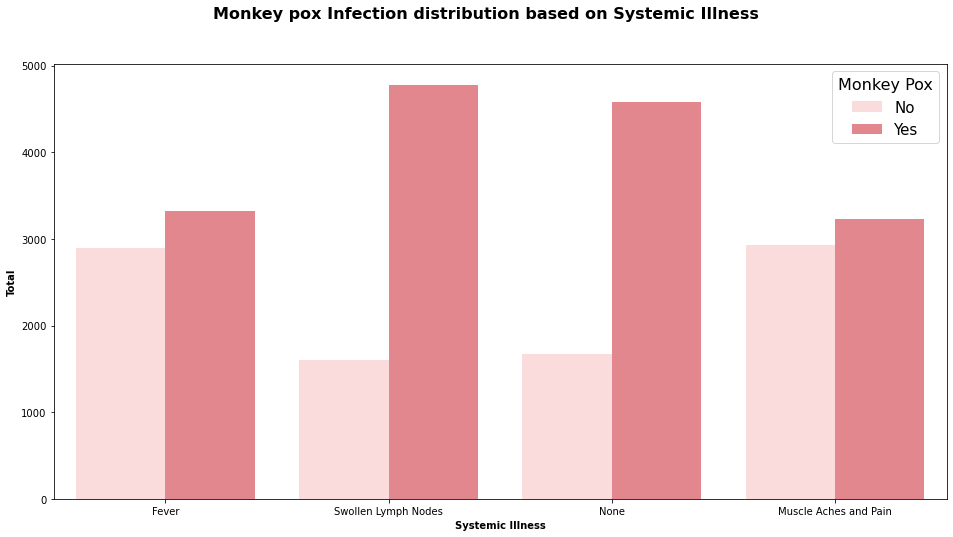

In [ ]:
draw_barplot("Monkey pox Infection distribution based on Systemic Illness",
            "Systemic Illness", "MonkeyPox", "Systemic Illness", [0, 1, 2, 3],
            ["Fever", "Swollen Lymph Nodes", "None", "Muscle Aches and Pain"],
            "Monkey Pox", ["No", "Yes"])

## Observation

#### 1- The distribution is almost the same between Monkey pox patients and pepole don't have the infection in Fever & Muscle aches and pain.
#### 2- The distribution is higher in positive Monkey pox patients in swollen lymph nodes and people who don't have systemic illness.

### Monkey pox Infection distribution based on Rectal Pain

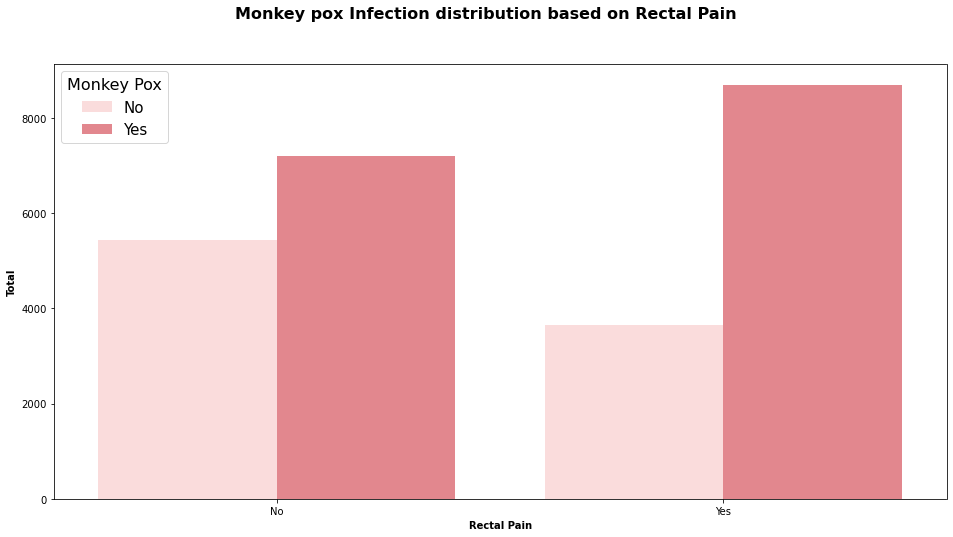

In [ ]:
draw_barplot("Monkey pox Infection distribution based on Rectal Pain",
            "Rectal Pain", "MonkeyPox", "Rectal Pain", [0, 1],
            ["No", "Yes"],
            "Monkey Pox", ["No", "Yes"])

## Observation

#### The distribution of positive Monkey Pox infection is higher in pepole who have rectal pain

### Monkey pox Infection distribution based on Sore Throat

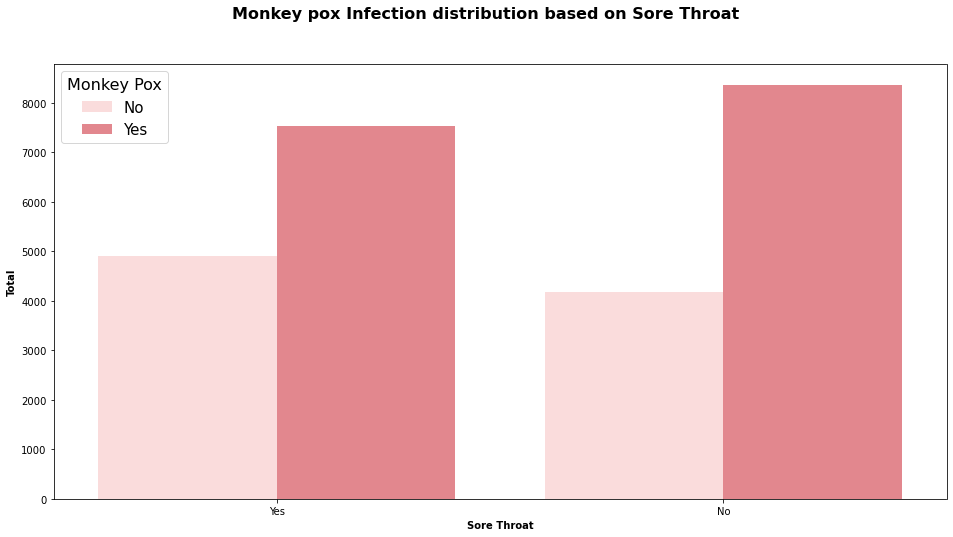

In [ ]:
draw_barplot("Monkey pox Infection distribution based on Sore Throat",
            "Sore Throat", "MonkeyPox", "Sore Throat", [0, 1], ["Yes", "No"],
            "Monkey Pox", ["No", "Yes"])

## Observation

#### The distribution of positive Monkey Pox infection is almost higher in people who don't have sore throat

### Monkey pox Infection distribution based on Penile Oedema

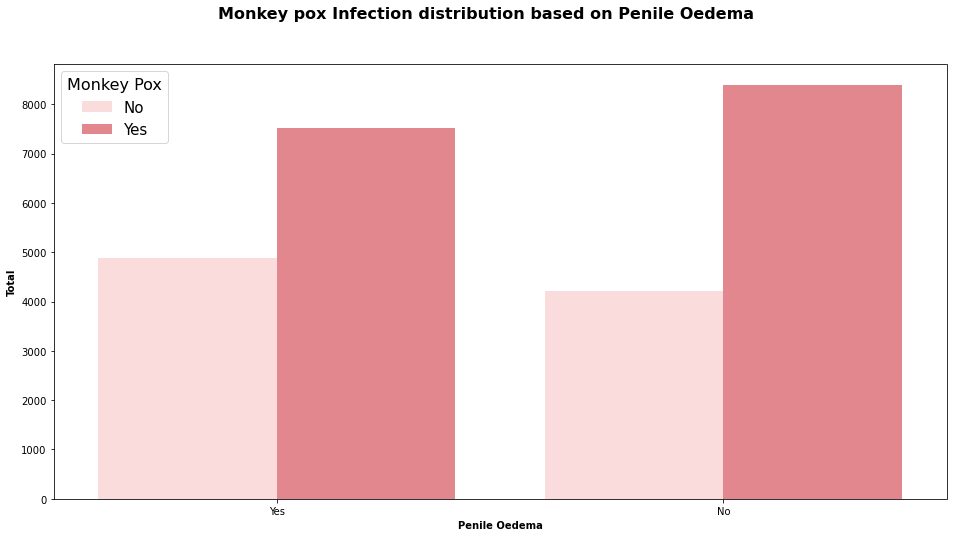

In [ ]:
draw_barplot("Monkey pox Infection distribution based on Penile Oedema",
            "Penile Oedema", "MonkeyPox", "Penile Oedema", [0, 1], ["Yes", "No"],
            "Monkey Pox", ["No", "Yes"])

## Observation

#### The distribution of positive Monkey Pox infection is almost higher in pepole who don't have penile oedema

### Monkey pox Infection distribution based on Oral Lesions

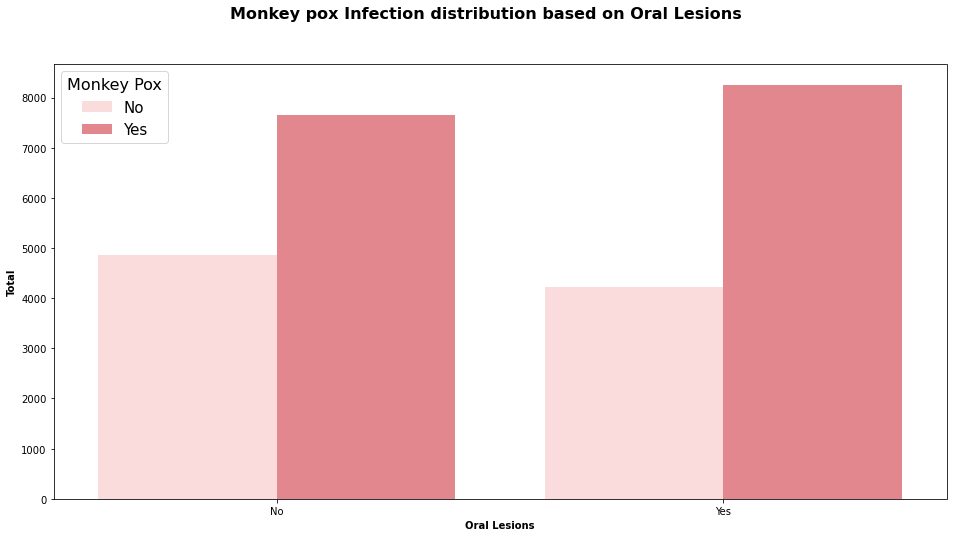

In [ ]:
draw_barplot("Monkey pox Infection distribution based on Oral Lesions",
            "Oral Lesions", "MonkeyPox", "Oral Lesions", [0, 1], ["No", "Yes"],
            "Monkey Pox", ["No", "Yes"])

## Observation

#### The distribution of positive Monkey Pox infection is almost higher in pepole who have oral lesions

### Monkey pox Infection distribution based on Solitary Lesion

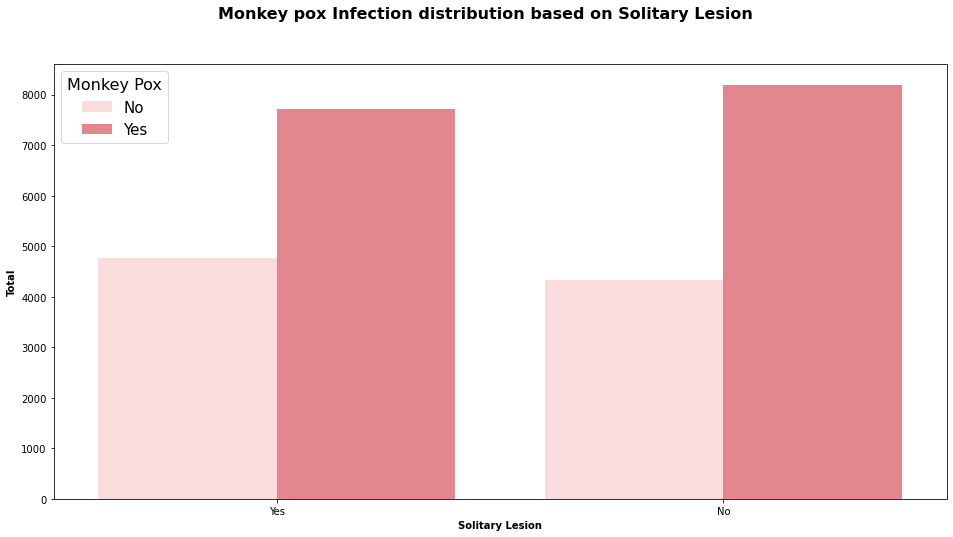

In [ ]:
draw_barplot("Monkey pox Infection distribution based on Solitary Lesion",
            "Solitary Lesion", "MonkeyPox", "Solitary Lesion", 
             [0, 1], ["Yes", "No"], "Monkey Pox", ["No", "Yes"])

## Observation

#### The distribution of positive Monkey Pox infection is almost higher in pepole who don't have Solitary Lesion

### Monkey pox Infection distribution based on Swollen Tonsils¶

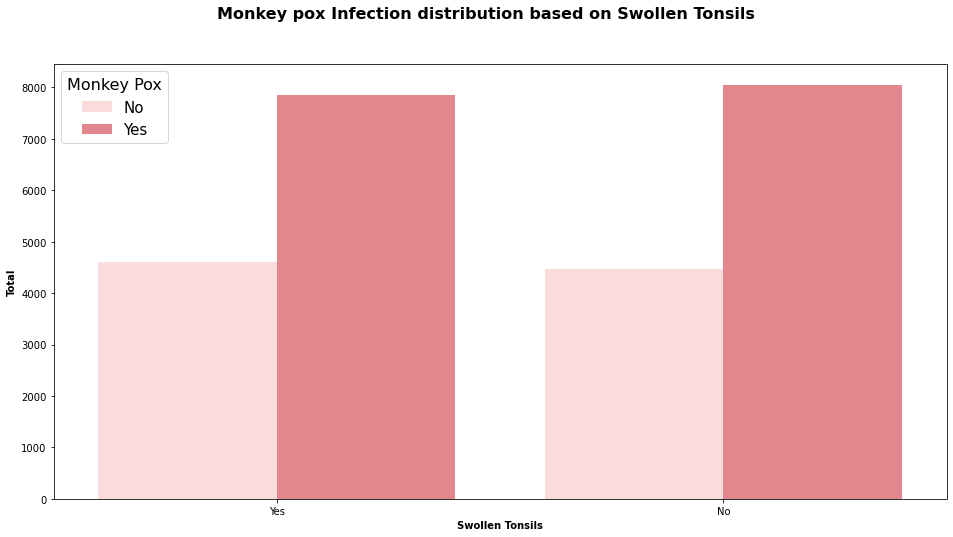

In [ ]:
draw_barplot("Monkey pox Infection distribution based on Swollen Tonsils",
            "Swollen Tonsils", "MonkeyPox", "Swollen Tonsils", 
             [0, 1], ["Yes", "No"], "Monkey Pox", ["No", "Yes"])

## Observation

#### The distribution of positive Monkey Pox infection is almost the same between pepole who don't have swellen tonsils and people who have it

### Monkey pox Infection distribution based on HIV Infection

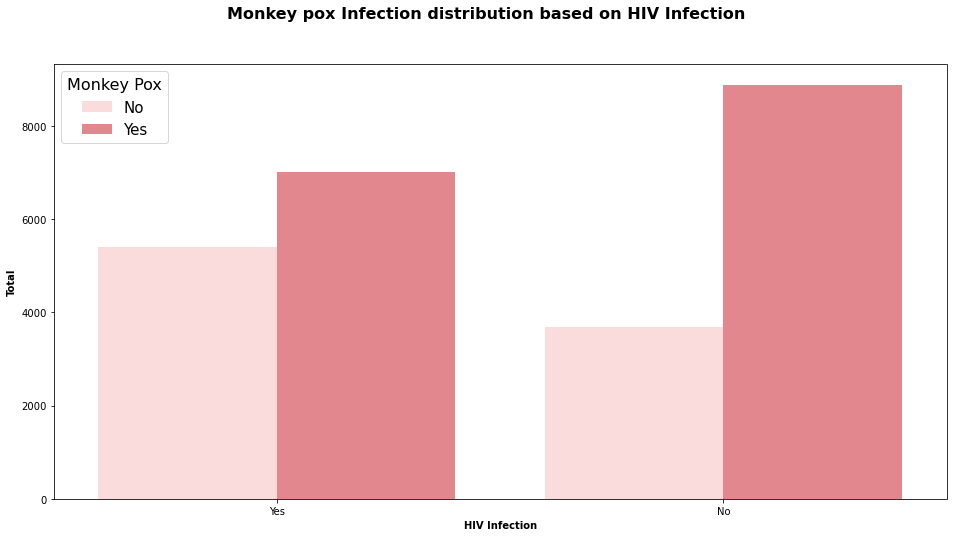

In [ ]:
draw_barplot("Monkey pox Infection distribution based on HIV Infection",
            "HIV Infection", "MonkeyPox", "HIV Infection", 
             [0, 1], ["Yes", "No"], "Monkey Pox", ["No", "Yes"])

## Observation

#### The distribution of positive Monkey Pox infection is higher in pepole who don't have HIV infection

### Monkey pox Infection distribution based on Sexually Transmitted Infection

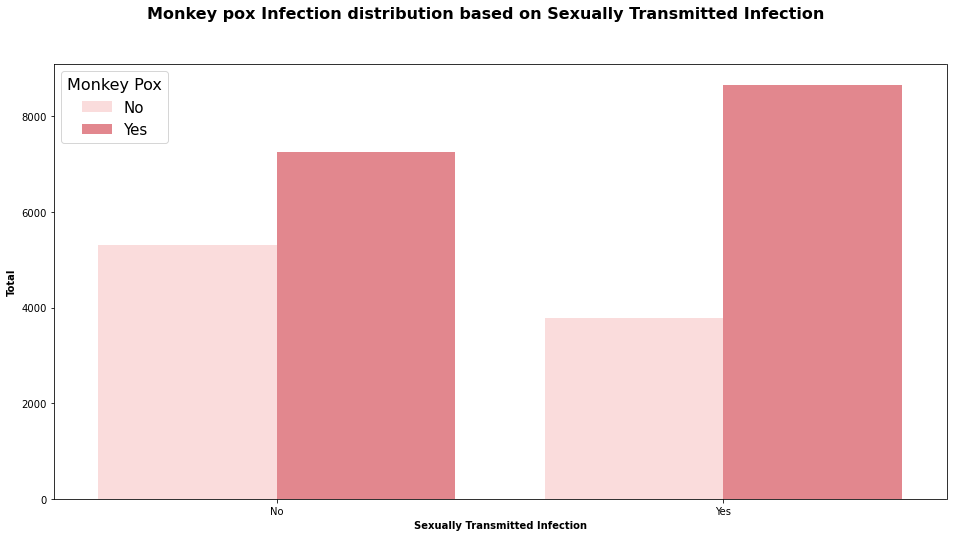

In [ ]:
draw_barplot("Monkey pox Infection distribution based on Sexually Transmitted Infection",
            "Sexually Transmitted Infection", "MonkeyPox", "Sexually Transmitted Infection", 
             [0, 1], ["No", "Yes"], "Monkey Pox", ["No", "Yes"])

## Observation

#### The distribution of positive Monkey Pox infection is higher in pepole who have sexually transmitted infection

## Multivariate

In [ ]:
## Correlation
corr = df.corr()
corr

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
Rectal Pain,1.000000,0.006214,0.005312,0.007747,0.001147,0.002113,0.005764,0.000666,0.140727
Sore Throat,0.006214,1.000000,0.009082,-0.000795,-0.003609,-0.002011,0.000771,-0.001901,0.063385
Penile Oedema,0.005312,0.009082,1.000000,0.003850,0.002781,0.000536,0.003620,-0.005722,0.061905
Oral Lesions,0.007747,-0.000795,0.003850,1.000000,-0.005198,-0.007757,-0.012153,-0.002725,0.051955
Solitary Lesion,0.001147,-0.003609,0.002781,-0.005198,1.000000,0.002874,-0.002335,0.009849,0.037471
Swollen Tonsils,0.002113,-0.002011,0.000536,-0.007757,0.002874,1.000000,-0.004258,-0.006469,0.013221
HIV Infection,0.005764,0.000771,0.003620,-0.012153,-0.002335,-0.004258,1.000000,0.001309,0.146192
Sexually Transmitted Infection,0.000666,-0.001901,-0.005722,-0.002725,0.009849,-0.006469,0.001309,1.000000,0.123376
MonkeyPox,0.140727,0.063385,0.061905,0.051955,0.037471,0.013221,0.146192,0.123376,1.000000


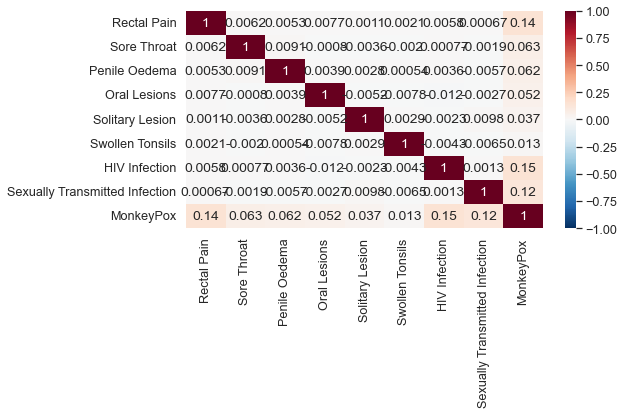

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

In [ ]:
category_columns = [column for column in df.columns if (df[column].dtype != 'float64' or df[column].dtype != 'int64')]
print(category_columns)

['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox']


In [ ]:
encoder = preprocessing.LabelEncoder()
for column in category_columns:
    df[column] = encoder.fit_transform(df[column])

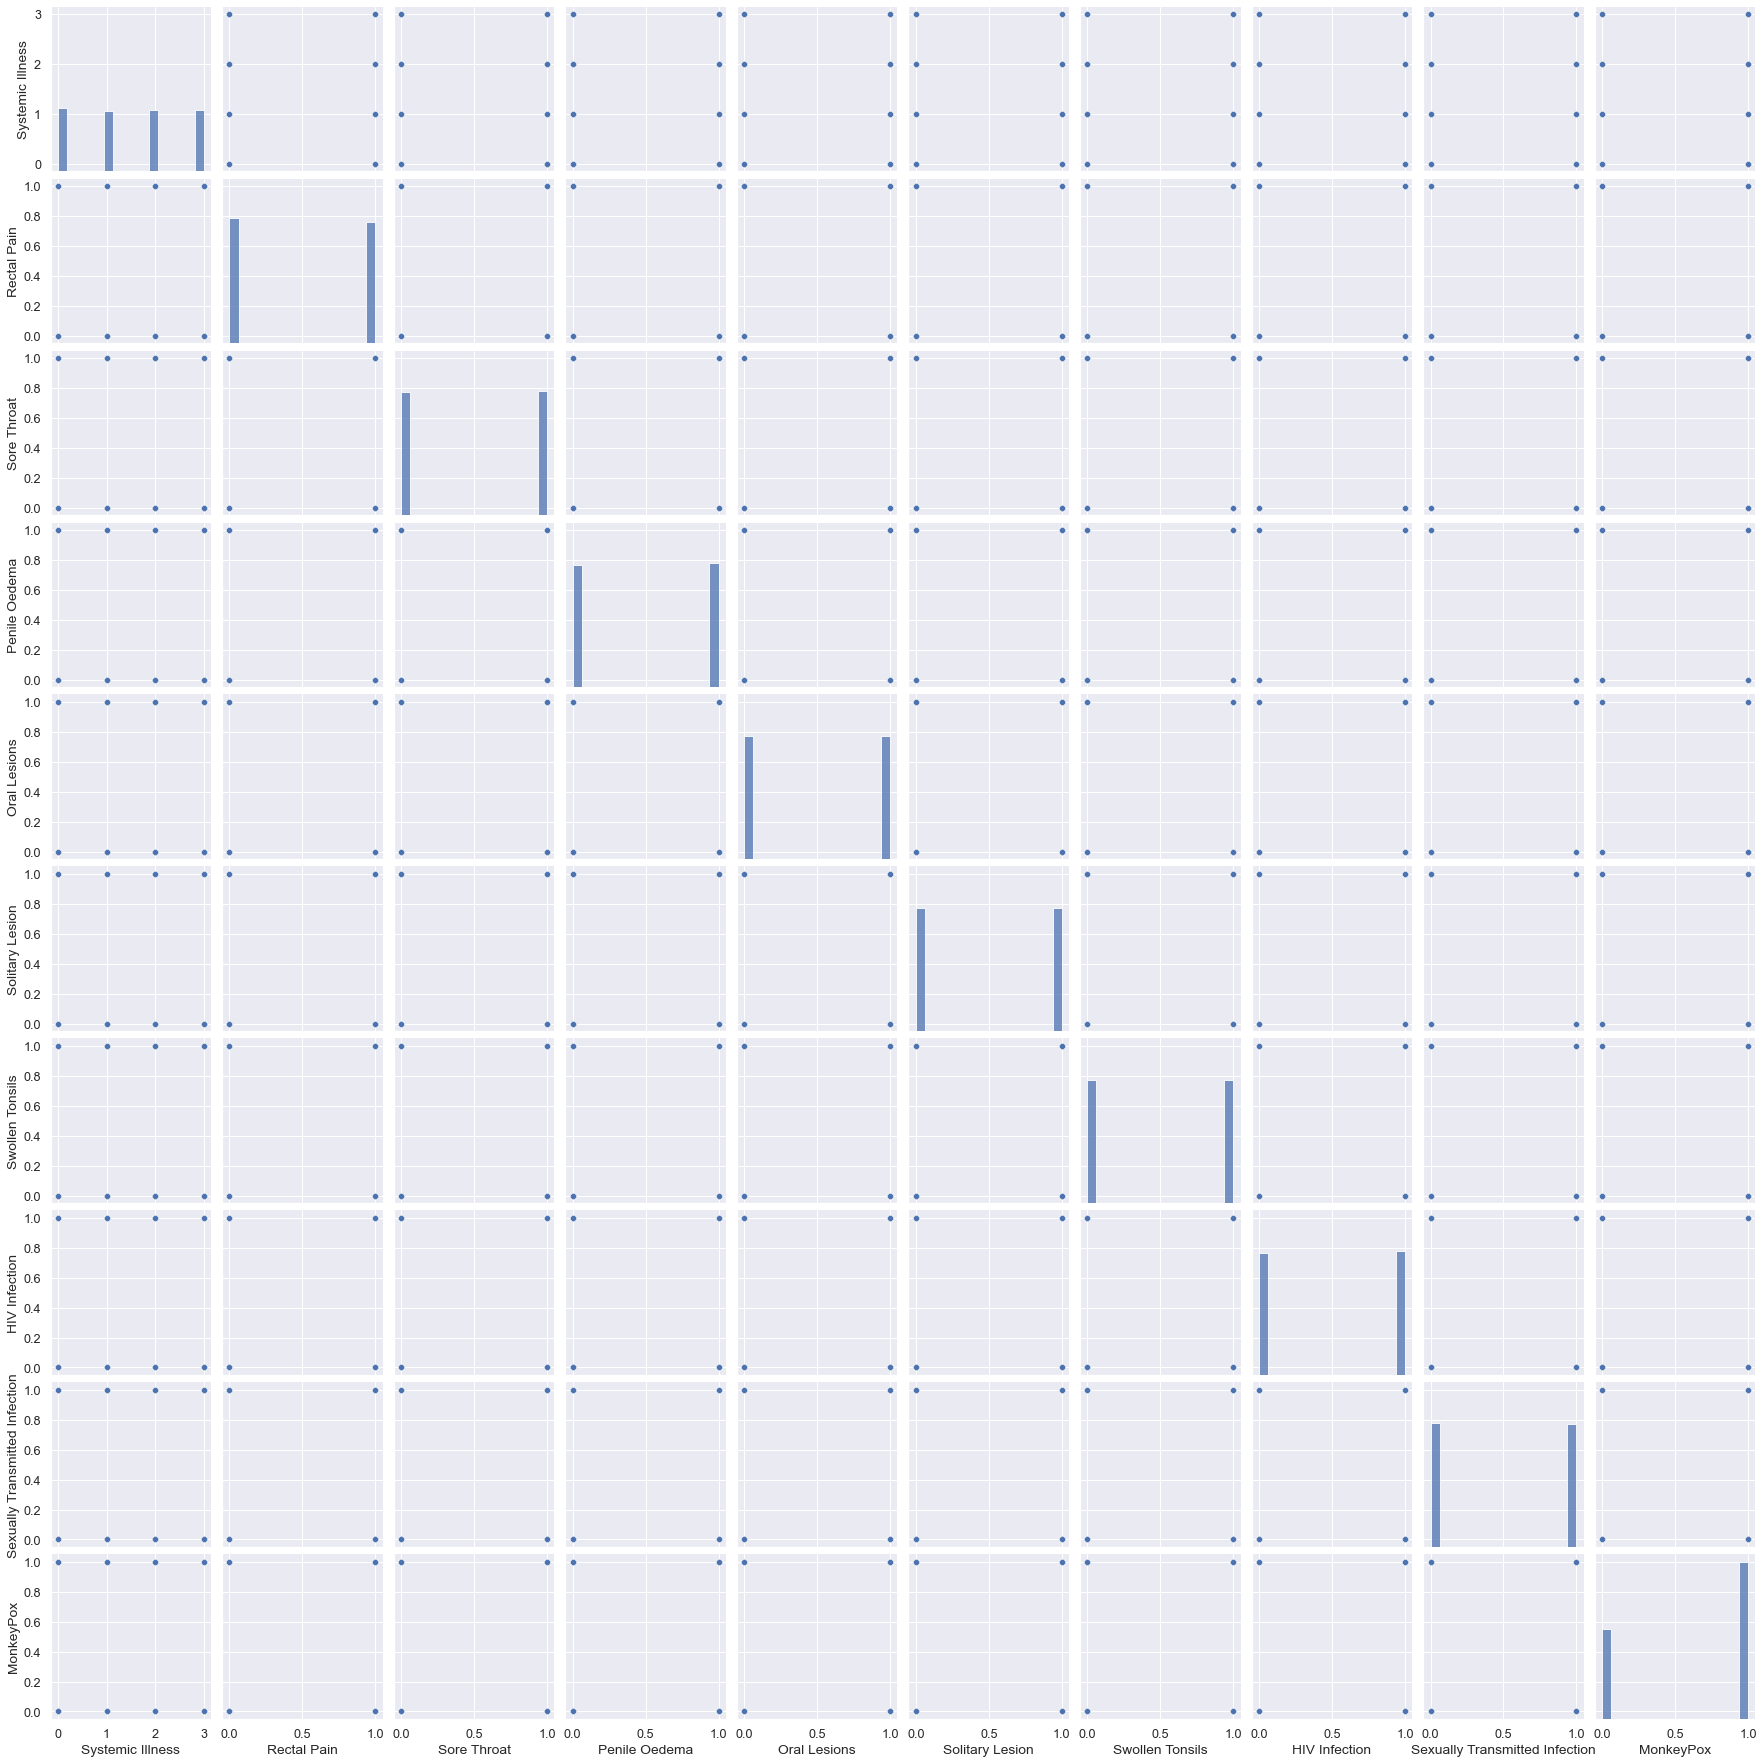

In [ ]:
sns.pairplot(df);
plt.show()

## Correlation Analysis

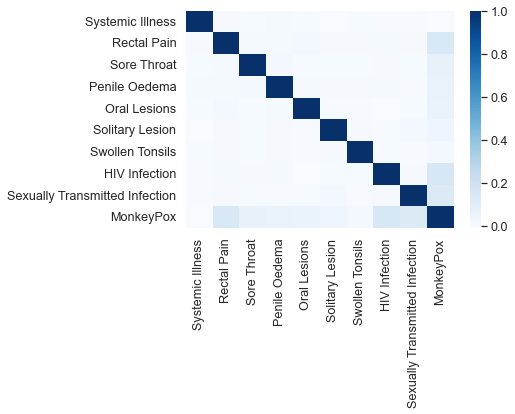

In [ ]:
sns.heatmap(df.corr(), cmap='Blues');

### observation
#### - No Features are significatly correlated  Week Correlation exist between HIV Infection & Sexually Transmitted Infection features

1    15909
0     9091
Name: MonkeyPox, dtype: int64


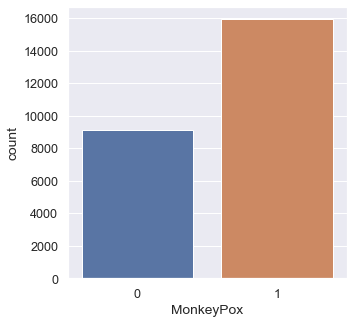

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df["MonkeyPox"])
print(df["MonkeyPox"].value_counts())